<a href="https://colab.research.google.com/github/anjali88/Data-Science/blob/master/Pushpanjali_Banik_tf2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we will use another dataset - the **`mnist`** dataset -  to build on our knowledge. In particular, we will:
  * introduce **`Computer Vision`** 
  * introduce **`convolutional layers`** into our models 
  * introduce the concept of **`regularisation`**
  * introduce the **`validation set`** in training our model 
  * introduce how to **`save`** and reuse our model 
* The image below sets out how this fits within our deep learning framework and exising knowledge

![alt text](https://github.com/DanRHowarth/Tensorflow-2.0/blob/master/Notebook%202%20-%20Summary_final.png?raw=true)

In [0]:
#Load Libraries
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.1.0)


In [0]:
#We are future proofing by importing modules that modify or replace exising modules that we may have used now 
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

#import helper libraries
import numpy as np
import matplotlib.pyplot as plt

#print out the version we are using 
print(tf.__version__)

2.1.0


In [0]:
# additional imports for this notebook
from tensorflow.keras import datasets, layers, models

# 1.2 Loading our Data


In [0]:
# split data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

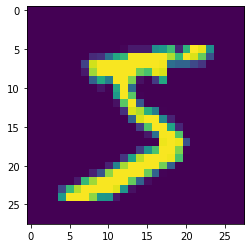

In [0]:
# look at data
plt.imshow(train_images[0])

In [0]:
#look at labels
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**What is the problem we are trying to solve?**
* As we can see, we have images of digits from 0 - 9, and labels from 0 - 9. We are trying to build a model that correctly classifies the digits in the image.

## 2. Data: Introduction to Computer Vision 

**What is Computer Vision?**
* Computer Vision is the field of how computers can gain understanding from images and videos. It includes tasks such as **`image recognition`** and **`object detection`**. Deep Learning is seen as the state of the art technology for solving computer vision problems. 

**Why is Deep Learning particularly good at it?**
* The layers within a deep learning model are good for identifying and modelling the different aspects of an image (such as edges, parts of faces, and other important parts of an image). The meaning that each layer extracts can be built up to form representations for lots of different image types that can then be classified.  
* In particular, **`convolutional layers`** are good at extracting representation from image data and they form the basis of deep learning models for image recognition. The ability to build larger and larger models that consist of these convolutional layers, and to train them with more and more data (thanks to increasing compute power), led to a leap forward in state of the art for computer vision. 

**How does it work?**
* Every image is represented by an array of numbers. You may have noticed this when we looked at the **`shape`** of the images we were processing. This shape represents the number of pixels in an image, and each pixel has a numerical value. This numerical value maps to a colour value that is displayed. It is also what we use as input values to our model. 

In [0]:
## lets start by looking at the shape of an image

## we can see that it is 28 x 28 pixels
train_images[0].shape

(28, 28)

In [0]:
## we can also see that these pixels are represented in an array of numbers 
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

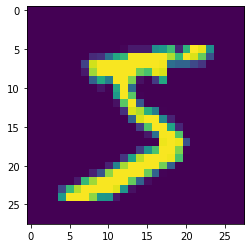

In [0]:
# we need plt.imshow() - or another library such as OpenCV or PIL - to output an image from this array
plt.imshow(train_images[0])

**What do the array values mean?**
* Each value leads to a colour for the pixel that the array value represents. Actualy what colour is displayed depends somewhat on the number of colour channels the array has. We have only one channel present in this dataset. This is grayscale channel. Typically, we will see three channels for colour images, with each channel representing one of Red, Green, Blue. A value in one channel will display a different colour than a value in another channel. 
* See the tutorials [here](https://www.w3schools.com/colors/default.asp) for more detail on how the values within a channel map to a colour.
* Its worth noting here that there are typically 256 values (0 - 255) available in each channel, making a total combination of c. 16.8m colours available per a three channel image!
* As per the previous notebook, we will rescale the arrays to between 0 and 1. This needs to happen in order to maximise the success of the training. 

**What about images of different shapes?**
* The size of an image can and does vary. In this case, we have small image of 28 x 28 pixels (or 28, 28, 1) given we have one channel. This was the same for the previous dataset and it makes it easy to train models. 
* Outside of introductory tutorials, It is likely that you will see much larger images, meaning many more pixels and therefore larger arrays to train and learn representations on. This will make the models larger and training more involved. 
* One final thing to note is that Deep Learning models always require an array of the same size to be passed to it. This means that images which differ in size need to be preprocessed so that they are the same size before being passed to the model. 

In [0]:
# we now need to reshape the data to add a colour channel 
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
# we can view the new shape 
print('\n train image shape')
print(train_images.shape)
# normalize the data 
train_images, test_images = train_images / 255.0, test_images / 255.0


 train image shape
(60000, 28, 28, 1)


**What else can I learn to improve my knowledge?**
* Images have to be fed into the model in the same shape each time. This requires pre-processing.
* Prior to feed images into a model, we can also change the image in certain ways to add noise and variety to the training data. This should mean that the model is more robust and better at generalizing to unseen data. 

## 3. Model Building 
### 3.1 Convolutional Models

**How do we build a convolutional neural network?**
* A convolutional neural network (CNN) contains both dense and convolutional layers. The convolutional layers form the **`base`** of the model and extracts representation from the image. The dense layers form the **`head`** of the model and takes this represetation and maps it to our output classes
* A convolutional layer takes our image as it (subject to any preprocessing to get it in a standard shape or augmented to add noise and variety to the dataset) - that is, we do not need to flatten the image into a **`1D`** array. We flatten the array after our final convolutional layer and prior to passing our input to the dense layer.

**Why use a convolutional layer?**
* A convolution better encodes the key information in an image than other types of layers. Their application to computer vision resulted in a marked improvement in what was state of the art. That's why we use them. 

**What is a convolutional layer?**
* Simply, a convolutional layer is a layer that performs a mathematical operations known as convolutional on the input data.  In contrast, a dense layer perfornms matrix multiplicaiton on its inputs. 
* Each convolutional layer have a user-defined set of filters (or windows) that we pass over the image. We define the number and size of filters, although they are typically a 3 x 3 matrix. 
* This filter contains a set of weights that will be learned by the model and which are used to multiply the input values and return a new value in the layer's output. Its these filters that contain the learning of the convolutional layers of the model, whose weights will be updated as we train so that they are more and more able to extract key information from the image.
* The filter is applied to all the image channels as it passes over each pixel location such that it will look at a specific row and column index position and all the array values available at that index:
$$(row, column, :)$$
* We won't go in to *how* convolutional works here, but see the cell at the end of this section for links that do explain how it works. 

**So what does a convolutional layer return?**
* A convolutional layer returns an output array of the same (row, column) shape as the input array, but with one channel only. 
* It tends to be the case that convolutional layer is paired with a **`pooling layer`**. We won't cover these in any detail, but its sufficient to know that a pooling layer tries to extract the key information from the convolutional layer while typically halving its size. 
* The diagram below set this out. 

![alt text](https://github.com/DanRHowarth/Tensorflow-2.0/blob/master/Notebook%202%20Convolution%20and%20Pooling%20Layers.png?raw=true)


In [0]:
## lets build our convolutional base
## we use the Sequential API but use .add() rather than passing the layers in as a list

# build model using sequential 
model = models.Sequential() 
# start adding layers. input shape has been defined, including the channel value we added via reshape earlier
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# max pooling layers
model.add(layers.MaxPooling2D((2,2)))
# this is then repeated to build 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# max pooling layers
model.add(layers.MaxPooling2D((2,2)))
# additional convolutional layer 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [0]:
# print model 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


**How do we get to the parameter count?**
* The parameters of a convolutional layer are defined by:
$$((filter\ height\ \times filter\ width)\ +\ bias\ term)\ \times number\ of\ filters$$

* The bias term is a value of 1 so the number of parameters for the first convolutional layer is:
$$((3 \times 3)+ 1)\ \times 32 = 320$$





**What about the classificaiton layer?**
* As we said above, a convolutional based needs a classification layer to take the information extracted from an image and map it to output classes. 
* We take the final output shape of the Convolutional layer and flatten it to a 1D array. We then define our output layer, which in this instance is a layer of 10 with a softmax activation function. We have also added an additional layer to provide additional parameters between the flattened and output layer. 

In [0]:
# flatten 
model.add(layers.Flatten())
# add a fully connected layer
model.add(layers.Dense(64, activation='relu'))
# add the output layer, a fully connected layer with a softmax activation
model.add(layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

**What else can I learn to improve my knowledge?**
* Understand more about convolution:
  * There are a lot of good articles out there too. For example, [Cezanne Comacho](https://cezannec.github.io/Convolutional_Neural_Networks/), and [Chris Olah](https://colah.github.io/posts/2014-07-Conv-Nets-Modular/) all provide a good understanding of how convolution works.
  * For the maths of convolution, have a look at [this paper](https://arxiv.org/pdf/1603.07285.pdf).


## 4. Training 
### 4.1 Validation Sets, Batch Sizes and Learning Rates

**What will we cover now?**
* We will cover more concepts around training the model: the purpose of a **`validation set;`** **`overfitting`**; and **`regularization`**. We will add in a validation and look for overfitting in our model performance. We won't add any regularization methods 
* We will also cover **`learning rates`** and  **`batch sizes`**. 

**What is validation set?**
* A validation set is a dataset that is kept aside from the training dataset. Tpyically, at the end of each epoch, the trained model is passed the validation set in inference model, and the loss and other metrics recorded. The model is then trained again for another epoch, and at the end of this epoch is passed the validation set in inference mode. 
* This allows us to see during training how the model performs on unseen data and also whether the model is **`under- or over-fitting`**. 

**How do we create a validation set?**
* We can set aside some data from our training set prior to beginning training, store it as a variable (or a set of (data, label) variables) and pass this to the validation_data argument in model.fit()
* We can use the validation_split parameter in model.fit() to specify the fraction of the data to be used as training data.

**What is under and overfitting?**
* When we train our models, they can sometimes struggle to generalise well. This means that they do not perform well on unseen data. 
* A model that overfits will get better and better results (loss and metrics) on the training data and decreasing results on the validation set. This is because it is fitting too much to the specific characteristics of the training data, which may not be present in the unseen data.
* A model that underfits does not perform well on either the training or validation data. 
* By incluidng a validation set,  we can monitor how well the model performs, and if the performance on the training and validation sets diverge too much then we can start to conclude that something need to be changed. 

**What can we do to address this?**
* We can use **`regularization`** to help prevent overfitting.
* We can regularize our model and its training in a number of ways, and to some extent they all penalize actions that may cause the model to overfit to the trianing data:
  * When building a model, we add a **`dropout`** layer. This turns off a user defined number of outputs from a layer r during training and helps prevents the model becoming reliant on certain paths through the model.
  *  During training, **`weight regularization`**. This penalises large weights (our learned parameters) in the model. Larger weights will create a larger loss value that the mdoel will then use to update the weights. A model with fewer larger weights, i.e. with the learning more evenly spread across the nodes, will have a better chance of generalizing well.   

**What is a batch_size?**
* A batch size is the number of samples the model trains on before performing a backward pass (model update). The number of batches in an epoch is equal to:
$$ \frac{number\ of\ sample\ in\ a\ training\ set}{batch\ size}$$
* We can set the batch size and choose to see the model performance as trains per batch size (using a parameter in **`model.fit()`**). 

**What is the learning rate?**
* The learning rate controls the size of the update to the learnable parameters (weights and biases) during the backward pass, based on the loss of the model.
* It is a parameter of the optimizer, set at the **`model.compile()`** stage, and can be set by the user. The trick is to set the learning to update the weights sufficiently to change performance, but not update them too much so that the model weights swing between higher and lower values without settling on a path to the best model.
* There are various strategies for mitigating this problem that are worth investigating.

In [0]:
## Lets compile the model again
model.compile(optimizer='adam',
              
              loss='sparse_categorical_crossentropy',
              
              metrics=['accuracy'])

## and build a training loop

history = model.fit(train_images, train_labels, 
          # add batch size
          batch_size = 32,
          # epochs           
          epochs = 10,
          # and add a validation set 
          validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 53s 1ms/sample - loss: 0.1669 - accuracy: 0.9483 - val_loss: 0.0586 - val_accuracy: 0.9822
Epoch 2/10
48000/48000 [==============================] - 54s 1ms/sample - loss: 0.0481 - accuracy: 0.9846 - val_loss: 0.0529 - val_accuracy: 0.9841
Epoch 3/10
48000/48000 [==============================] - 52s 1ms/sample - loss: 0.0356 - accuracy: 0.9888 - val_loss: 0.0447 - val_accuracy: 0.9862
Epoch 4/10
48000/48000 [==============================] - 53s 1ms/sample - loss: 0.0265 - accuracy: 0.9915 - val_loss: 0.0311 - val_accuracy: 0.9908
Epoch 5/10
48000/48000 [==============================] - 53s 1ms/sample - loss: 0.0214 - accuracy: 0.9928 - val_loss: 0.0378 - val_accuracy: 0.9888
Epoch 6/10
48000/48000 [==============================] - 53s 1ms/sample - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.0415 - val_accuracy: 0.9876
Epoch 7/10
48000/48000 [==============================] 

Accuracy is 99% on validation set. 

In [0]:
# plot loss and accuracy
# if we print out our history object we can see that it now includes validation values
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [0]:
# pass to dataframe
import pandas as pd

# pass history to dataframe object
history_df = pd.DataFrame(history_dict)

print(history_df)

       loss  accuracy  val_loss  val_accuracy
0  0.166867  0.948271  0.058602      0.982167
1  0.048083  0.984563  0.052934      0.984083
2  0.035623  0.988833  0.044679      0.986250
3  0.026467  0.991458  0.031059      0.990833
4  0.021376  0.992813  0.037821      0.988833
5  0.015825  0.995021  0.041481      0.987583
6  0.013664  0.995687  0.038927      0.989917
7  0.011536  0.996396  0.037506      0.989917
8  0.010196  0.996833  0.042076      0.991000
9  0.009436  0.996708  0.035985      0.990750


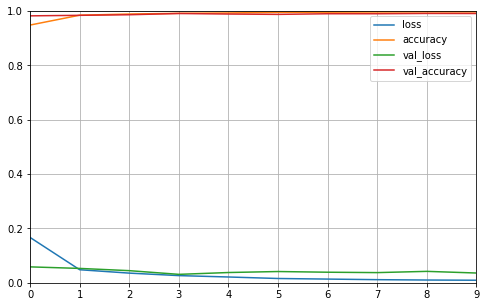

In [0]:
# we can use plot functionality of pandas to quickly plot our results
history_df.plot(figsize=(8,5))
# tailor our plot. Show the grid
plt.grid(True)
# set the vertical range to [0 -1]
plt.gca().set_ylim(0, 1)
# display plot
plt.show()

### 4.4 Saving Models

**What do we mean by *saving a model*?**
* We can save our progress as we train our models. We can save our progress in two ways:
  * *during training*, so that our models are saved after each epoch (or, after an epoch that shows model improvement). 
  * *after training*, so that our model has completed its training before we save it
* Of course, we can opt to save the model both during *and* after training. 
* Using `tensorflow 2.0`, we can opt to save the model either manually, i.e. after the model has trained, or by using callbacks - i.e. incorporating saving into the training process. 
  
**What are we saving?**
* We can save the model weights only, the full model (including the weights and the architecture), and the optimizer state.
* Its useful to remember that when we are training a model, the parameters we are updating during the training process are the weights at each layer of the model. Our aim is to train on (data, labels) pairs that mean we can predict effectively on unseen data using the weights we have trained. So it is these weights that are saved, optionally along with the model architecture. 
* Optimizer state. We haven't focussed too much on optimizers, but remember that this is the way that the model weights are updated. The size of the update is set by the (user defined) **`learning rate`**. When we save a model we can therefore save the **`optimizer-state`**, meaning we can continue training a loaded model from the state it was in when the model was saved.  

**Why save a model?**
* So that we can reuse it later. This could be to deploy it and use it in inference mode, or to continue training from the point at which we stopped. 

**Once we have saved a model, how do we use it again?**
* Once we have saved our weights and/or model, we can restore the model in a couple of different ways. If we decide to save the weights only, we need to create an identical model to the one that was used to create our weights. If we saved both the model and weights, we can load this entire model.

**What are the ways of doing it?**
* In this tutorial (notebook 2), we will look at saving and loading model weights and model + weight manually, i.e. after training. 
* In notebook 3, we will look at how to save during and after training using callbacks. 
* We will use the Keras API. Note there are some other ways to save the model covered in the [tensorflow 2.0 tutorials](https://www.tensorflow.org/beta/tutorials/keras/save_and_restore_models) provided by Google.



In [0]:
## lets go through the steps of saving the model weights only

# here we define a location for the weights to be saved 
model.save_weights('./checkpoints/my_checkpoint')

In [0]:
# to load the weights we need to create a new instance of the same model architecture 
new_instance = model

In [0]:
# then we can load the weights 
new_instance.load_weights('./checkpoints/my_checkpoint')

In [0]:
new_instance.weights[0][0][0][0]

<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([ 0.04556673, -0.26932698, -0.03634606, -0.31952682,  0.0472606 ,
       -0.00215081,  0.08703726,  0.03582785, -0.29666814,  0.00171104,
        0.08579903, -0.32776594, -0.2396187 ,  0.12862141, -0.00797031,
        0.2182629 , -0.05623506, -0.28996643,  0.03816007, -0.03198093,
        0.22306302,  0.26011452, -0.1934522 ,  0.05250368, -0.01064176,
       -0.01398766, -0.06618564,  0.1420222 ,  0.07068293,  0.07796174,
       -0.04445089,  0.26675996], dtype=float32)>

#### 4.3.2 Saving and Loading an entire model

In [0]:
# save model to HDF5 format
model.save('my_model.h5')

# recreate the saved model, including weights and optimizer 
new_model = keras.models.load_model('my_model.h5')

# view summary
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

###So, what did we cover in this section?
* Validation sets
* Overfitting 
* Regularization
* Learning Rates, Batch Sizes
* Saving Models

**How does it add to our existing knowledge?**
* We have built on our undertanding of the training loop by adding different aspects to it such as batch size and validation set, as well as getting a feel for what we need to guard against in training models (e.g. overfitting)

**What else can I learn to improve my knowledge?**
* In the next notebook, we will use a callback to save a model as it trains. 
* Overfitting - there is much more to this topic. There is a good treatment of this subject in [Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/). 

##5. Evaluation and Inference 

In [0]:
## using the model we have just saved, evaluate it on the test set 
## if you are stuck, use some of the code from notebook 1
# 
test_loss, test_acc = model.evaluate(test_images, test_labels)

## if we had saved our weights or model and loaded them up, we would use the model
## variable name we had saved here

10000/10000 [==============================] - 4s 379us/sample - loss: 0.0325 - accuracy: 0.9912


In [0]:
# show how the model performs in inference mode. Again, use some code from previous notebook
print(test_acc)
print(test_loss)

0.9912
0.032465098444359686


## 6. Summary

![alt text](https://github.com/DanRHowarth/Tensorflow-2.0/blob/master/Notebook%202%20-%20Summary_final.png?raw=true)

# 8. Excercises

In [0]:
## build another convolution model
## add more layers, vary their size and look up dropout and how to add that


## build our convolutional base
## use the Sequential API but use .add() rather than passing the layers in as a list

# build model using sequential 
model1 = models.Sequential() 
# start adding layers. input shape has been defined, including the channel value we added via reshape earlier
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
# max pooling layers
model1.add(layers.MaxPooling2D((2,2)))
# this is then repeated to build 
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Dropout(0.25))
model1.add(layers.Flatten())
# additional layer 
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(10, activation='softmax'))

In [0]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)             

In [0]:
#compile the model
model1.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

#fit the model
history1 = model1.fit(train_images, train_labels,
          batch_size= 32,
          epochs=10,
          validation_split=0.3)

print("\n")

## evaluate the model and use it inference mode 
test_loss1, test_acc1 = model1.evaluate(test_images, test_labels)
print(test_acc1)
print(test_loss1)

## save the model 
model1.save('my_model1.h5')

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 143s 3ms/sample - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.0354 - val_accuracy: 0.9905
Epoch 2/10
42000/42000 [==============================] - 143s 3ms/sample - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.0344 - val_accuracy: 0.9915
Epoch 3/10
42000/42000 [==============================] - 143s 3ms/sample - loss: 0.0238 - accuracy: 0.9925 - val_loss: 0.0288 - val_accuracy: 0.9932
Epoch 4/10
42000/42000 [==============================] - 142s 3ms/sample - loss: 0.0202 - accuracy: 0.9935 - val_loss: 0.0299 - val_accuracy: 0.9929
Epoch 5/10
42000/42000 [==============================] - 142s 3ms/sample - loss: 0.0193 - accuracy: 0.9939 - val_loss: 0.0382 - val_accuracy: 0.9916
Epoch 6/10
42000/42000 [==============================] - 141s 3ms/sample - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.0368 - val_accuracy: 0.9914
Epoch 7/10
42000/42000 [==========================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


       loss  accuracy  val_loss  val_accuracy
0  0.024676  0.991976  0.035439      0.990500
1  0.023860  0.992310  0.034404      0.991500
2  0.023785  0.992500  0.028803      0.993222
3  0.020168  0.993548  0.029872      0.992944
4  0.019315  0.993905  0.038243      0.991556
5  0.019964  0.993810  0.036769      0.991389
6  0.017682  0.994405  0.031680      0.992833
7  0.015954  0.994190  0.041183      0.991333
8  0.018124  0.993881  0.037014      0.991667
9  0.015186  0.995405  0.038197      0.992278


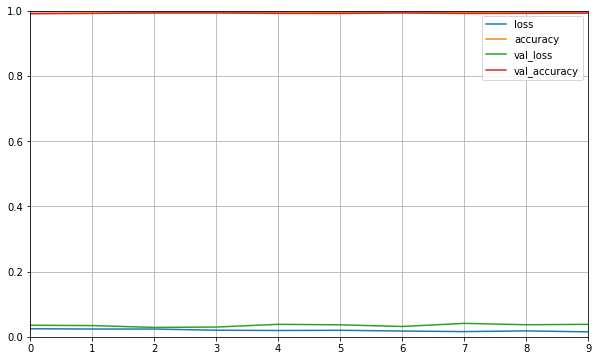

In [0]:
# plot loss and accuracy
# if we print out our history object we can see that it now includes validation values
history_dict1 = history1.history
print(history_dict1.keys())

print("\n")
history_df1 = pd.DataFrame(history_dict1)
print(history_df1)

# we can use plot functionality of pandas to quickly plot our results
history_df1.plot(figsize=(10,6))
# tailor our plot. Show the grid
plt.grid(True)
# set the vertical range 
plt.gca().set_ylim(0, 1)
# display plot
plt.show()


# 9. Further Reading
* Work through Chapter 15 - page 517 - of Python Machine Learning for another implementation of a Convolutional Neural Network
* Optionally, work through Chapter 14 for a deeper understanding of tensorflow 2.0